# Importing libraries

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import StackingRegressor
from mlxtend.regressor import StackingCVRegressor
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
pd.set_option("display.max_columns", 100)

from datetime import datetime

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()


# for Q-Q plots
import scipy.stats as stats
from sklearn.base import clone
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Bike sharing
## ITI Alex G1

**Nouhrhan Elaraby**

**Lujain Kotb**

**Ibrahim Yaseen**

**Mohamed Abd Elrazik**

**Sondos Omar**

# Reading the data

In [2]:
data=pd.read_csv('../input/bike-sharing-demand/train.csv')


In [3]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
col_names=list(data.columns)
for index,col_name in enumerate(col_names):
    print(index ," :" ,col_name)

0  : datetime
1  : season
2  : holiday
3  : workingday
4  : weather
5  : temp
6  : atemp
7  : humidity
8  : windspeed
9  : casual
10  : registered
11  : count


In [6]:
data=data.rename(columns={col_names[5]: "Temperature(C)",col_names[6]:"Dew Temperature(C)",col_names[7]: "humidity(%)",
                          col_names[8]:"Wind Speed(m/s)",col_names[11]:"Number of rented bikes"
              })

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   datetime                10886 non-null  object 
 1   season                  10886 non-null  int64  
 2   holiday                 10886 non-null  int64  
 3   workingday              10886 non-null  int64  
 4   weather                 10886 non-null  int64  
 5   Temperature(C)          10886 non-null  float64
 6   Dew Temperature(C)      10886 non-null  float64
 7   humidity(%)             10886 non-null  int64  
 8   Wind Speed(m/s)         10886 non-null  float64
 9   casual                  10886 non-null  int64  
 10  registered              10886 non-null  int64  
 11  Number of rented bikes  10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


# Checking Null Values

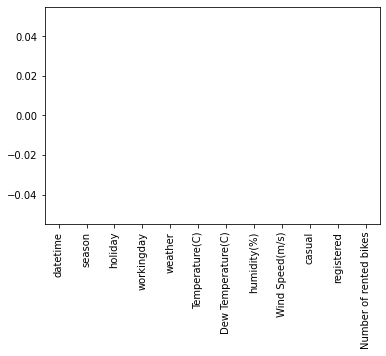

In [8]:
data.isna().sum().plot(kind="bar")
plt.show()

In [9]:
data.isna().sum()

datetime                  0
season                    0
holiday                   0
workingday                0
weather                   0
Temperature(C)            0
Dew Temperature(C)        0
humidity(%)               0
Wind Speed(m/s)           0
casual                    0
registered                0
Number of rented bikes    0
dtype: int64

# Checking the type of Data

In [10]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   datetime                10886 non-null  object 
 1   season                  10886 non-null  int64  
 2   holiday                 10886 non-null  int64  
 3   workingday              10886 non-null  int64  
 4   weather                 10886 non-null  int64  
 5   Temperature(C)          10886 non-null  float64
 6   Dew Temperature(C)      10886 non-null  float64
 7   humidity(%)             10886 non-null  int64  
 8   Wind Speed(m/s)         10886 non-null  float64
 9   casual                  10886 non-null  int64  
 10  registered              10886 non-null  int64  
 11  Number of rented bikes  10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


# Converting Date and splitting it

In [11]:
def convert_date(df):
    
    
    df['datetime'] = pd.to_datetime(df['datetime'])
    df['month'] = df['datetime'].dt.month
    df['hour'] = df['datetime'].dt.hour
    df['weekday'] = df['datetime'].dt.dayofweek
    df["day"]=df["datetime"].dt.day
    df["year"]=df["datetime"].dt.year
    df['dayofweek'] = df['datetime'].dt.dayofweek
    df['month_start'] = df['datetime'].dt.is_month_start
    df['woy'] = df['datetime'].dt.isocalendar().week.astype(int)
    
    return df

In [12]:
data=convert_date(data)

In [13]:
data.head()

,datetime,season,holiday,workingday,weather,Temperature(C),Dew Temperature(C),humidity(%),Wind Speed(m/s),casual,registered,Number of rented bikes,month,hour,weekday,day,year,dayofweek,month_start,woy
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0,5,1,2011,5,True,52
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,5,1,2011,5,True,52
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,2,5,1,2011,5,True,52
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,3,5,1,2011,5,True,52
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,4,5,1,2011,5,True,52


# Statitical description of the features

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
Temperature(C),10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
Dew Temperature(C),10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity(%),10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
Wind Speed(m/s),10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


## Visualizations

## showing distribution of rented bikes

Text(0.5, 1.0, 'Box plot on Count Across Day of week')

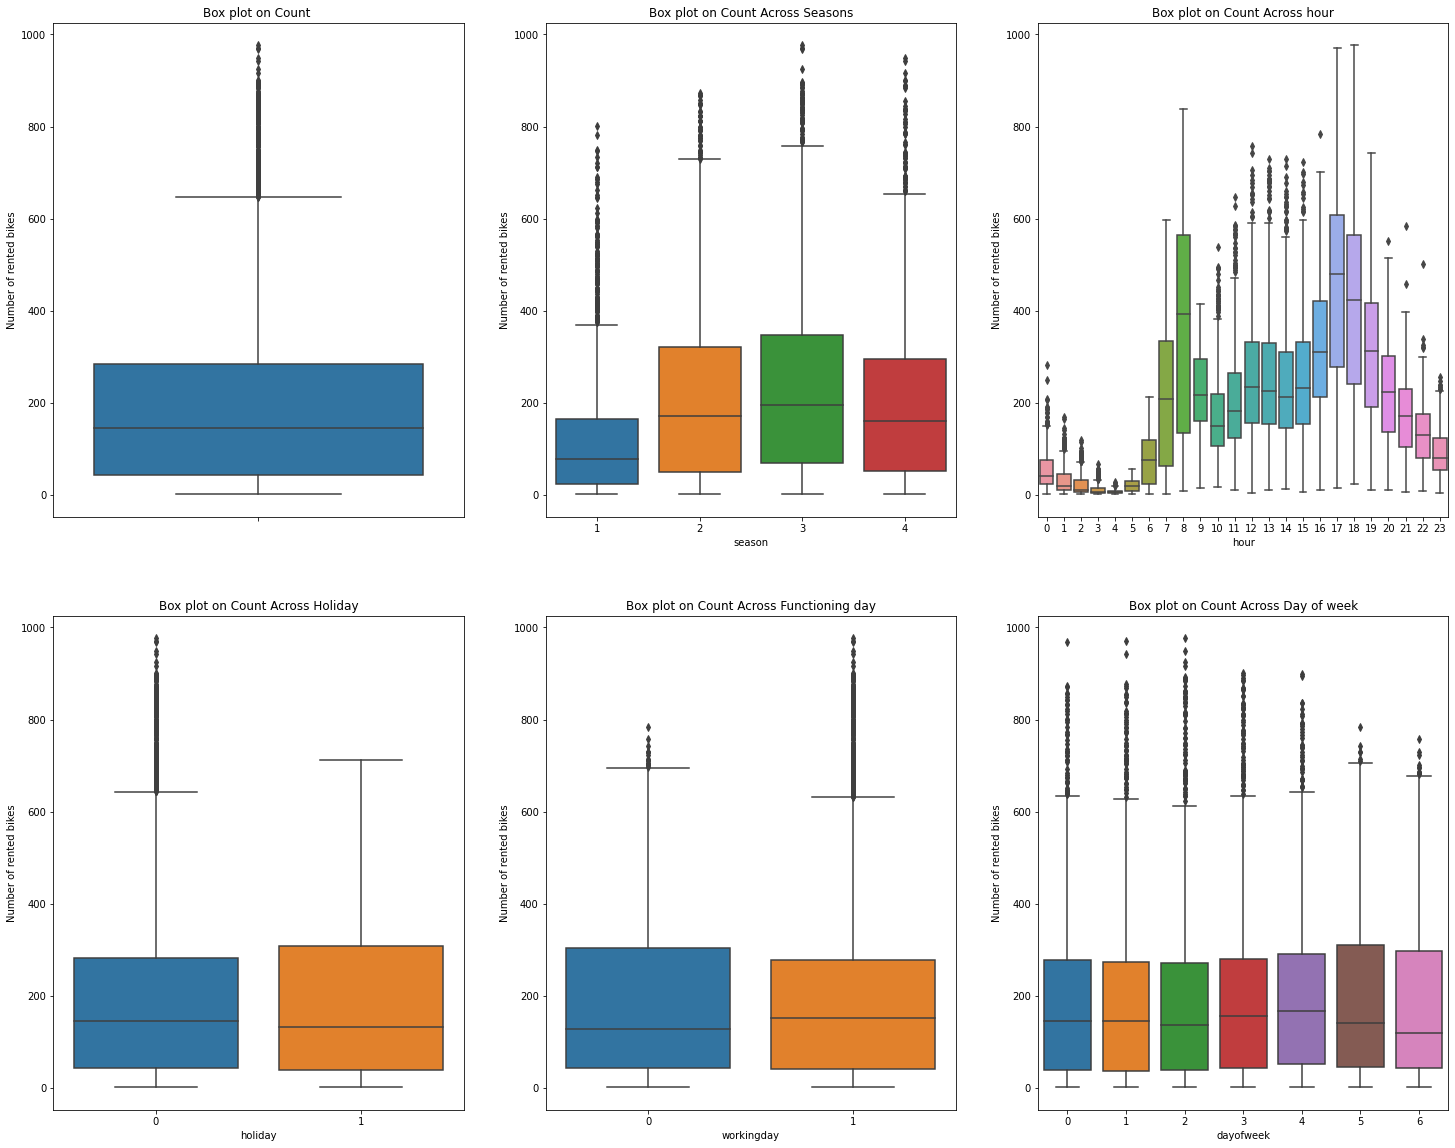

In [15]:
fig, ax = plt.subplots(2, 3, figsize=(25, 20))
sns.boxplot(y=data["Number of rented bikes"],ax=ax[0][0])
ax[0][0].set_title("Box plot on Count ")
sns.boxplot(x="season",y="Number of rented bikes",data=data,ax=ax[0][1])
ax[0][1].set_title("Box plot on Count Across Seasons")
sns.boxplot(x="hour",y="Number of rented bikes",data=data,ax=ax[0][2])
ax[0][2].set_title("Box plot on Count Across hour")
sns.boxplot(x="holiday",y="Number of rented bikes",data=data,ax=ax[1][0])
ax[1][0].set_title("Box plot on Count Across Holiday")
sns.boxplot(x="workingday",y="Number of rented bikes",data=data,ax=ax[1][1])
ax[1][1].set_title("Box plot on Count Across Functioning day")
sns.boxplot(x="dayofweek",y="Number of rented bikes",data=data,ax=ax[1][2])
ax[1][2].set_title("Box plot on Count Across Day of week")

# Correlations between variables

<AxesSubplot:>

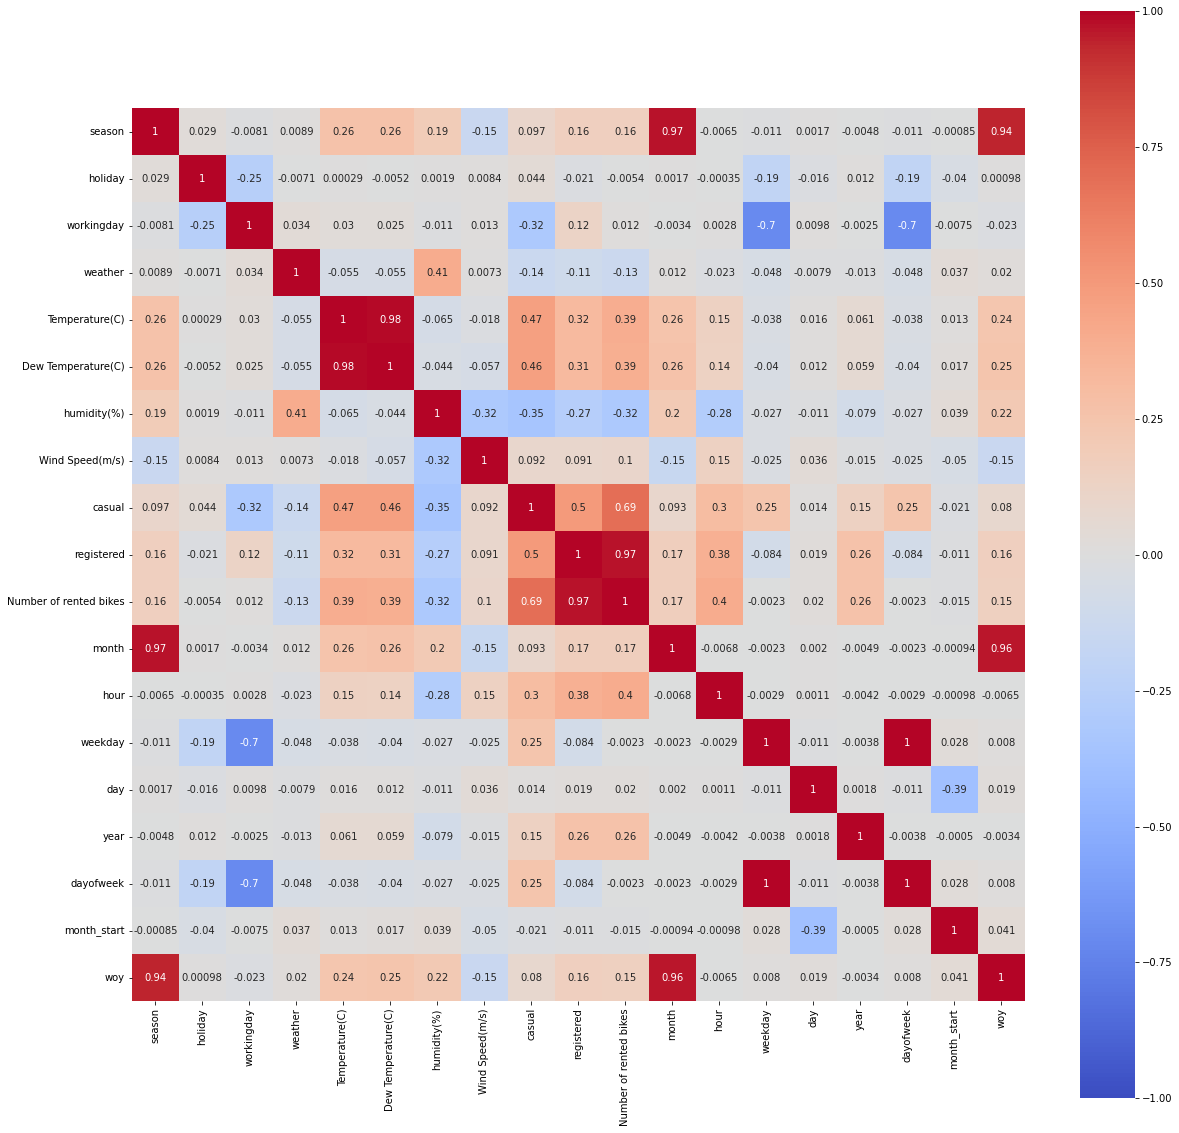

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr("pearson"),
            vmin=-1, vmax=1,
            cmap='coolwarm',
            annot=True, 
            square=True)

#  Sorted correlation of variables to the target

In [17]:
df1Corr=pd.DataFrame(data.corr().unstack().sort_values(ascending=False)['Number of rented bikes'],columns=['Correlation to the target'])
df1Corr.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,Correlation to the target
Number of rented bikes,1.000000
registered,0.970948
casual,0.690414
hour,0.400601
Temperature(C),0.394454
Dew Temperature(C),0.389784
year,0.260403
month,0.166862
season,0.163439
woy,0.152512


# Plotting variables to the target

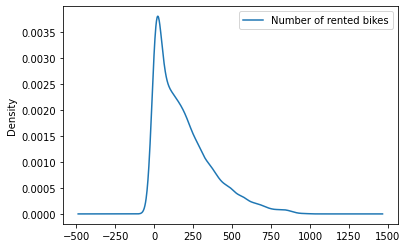

In [18]:
data.plot(x='datetime',y='Number of rented bikes',kind='kde');

# Seasons with most rents¶

In [19]:
df1VizSeasons=pd.DataFrame(data.groupby('season').sum()['Number of rented bikes'].sort_values(ascending=False))
df1VizSeasons.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,Number of rented bikes
season,
3,640662
2,588282
4,544034
1,312498


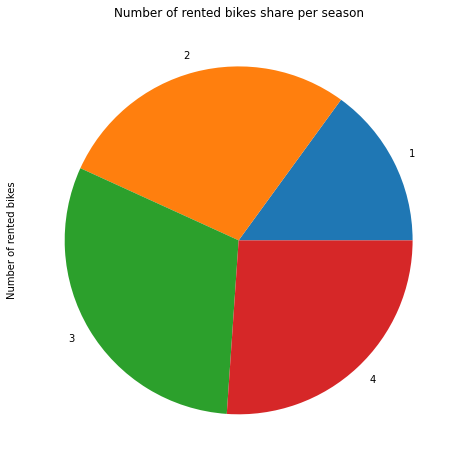

In [20]:
plt.figure(figsize=(9,8))
data.groupby('season').sum()['Number of rented bikes'].plot.pie();
plt.title("Number of rented bikes share per season");

# Checking rents per hours

<AxesSubplot:xlabel='hour'>

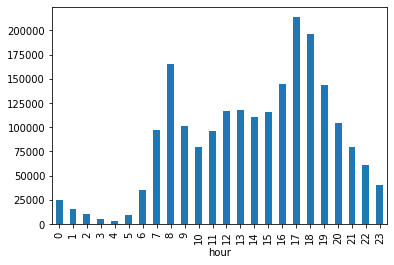

In [21]:
data.groupby('hour').sum()['Number of rented bikes'].plot.bar()

# Rented bikes vs Days of the week

In [22]:
df1VizDays=pd.DataFrame(data.groupby('dayofweek').sum()['Number of rented bikes'].sort_values(ascending=False))
df1VizDays.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,Number of rented bikes
dayofweek,
5,311518
3,306401
4,302504
0,295296
2,292226
1,291985
6,285546


Days are encoded 0 Mondays and 6 Sundays

# Temperature vs rented bikes

<AxesSubplot:xlabel='Temperature(C)'>

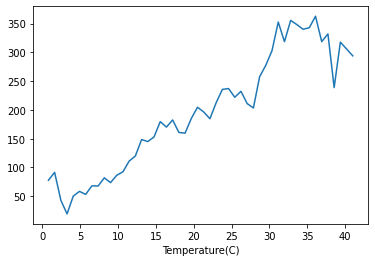

In [23]:
data.groupby('Temperature(C)').mean()['Number of rented bikes'].plot()

# Visualizing rents with years, months and hours

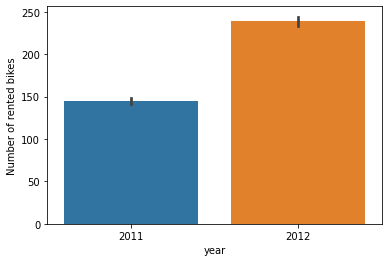

In [24]:
#plt.figure(figsize=(14,14))
sns.barplot(data=data, x='year', y=data['Number of rented bikes']);

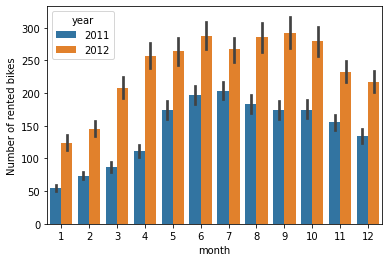

In [25]:
sns.barplot(data=data, x='month', y=data['Number of rented bikes'], hue='year');


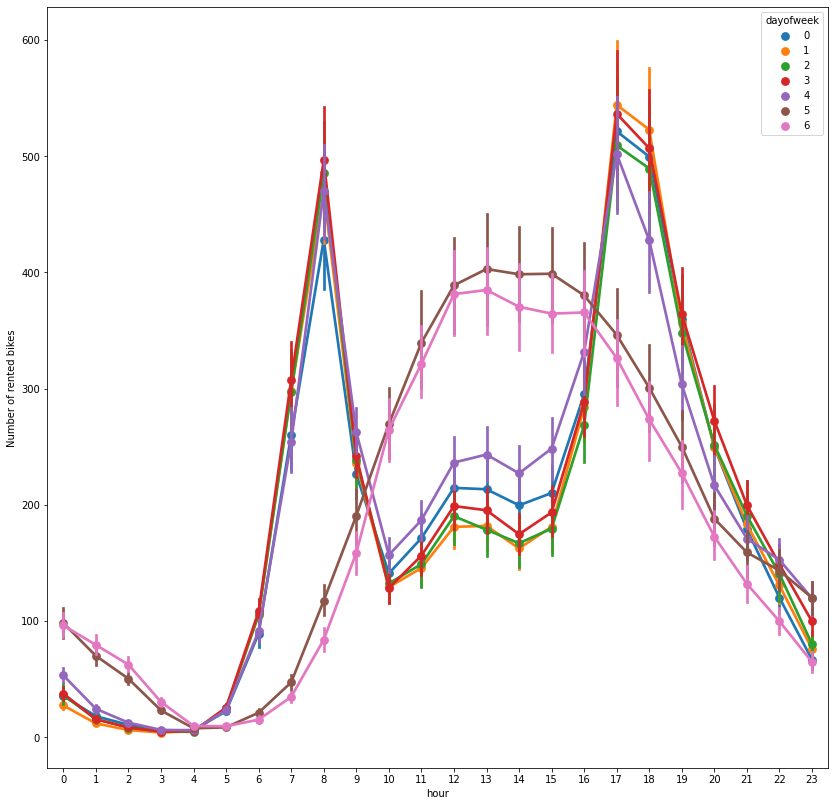

In [26]:
plt.figure(figsize=(14,14))
sns.pointplot(data=data, x='hour', y=data['Number of rented bikes'], hue='dayofweek');

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   datetime                10886 non-null  datetime64[ns]
 1   season                  10886 non-null  int64         
 2   holiday                 10886 non-null  int64         
 3   workingday              10886 non-null  int64         
 4   weather                 10886 non-null  int64         
 5   Temperature(C)          10886 non-null  float64       
 6   Dew Temperature(C)      10886 non-null  float64       
 7   humidity(%)             10886 non-null  int64         
 8   Wind Speed(m/s)         10886 non-null  float64       
 9   casual                  10886 non-null  int64         
 10  registered              10886 non-null  int64         
 11  Number of rented bikes  10886 non-null  int64         
 12  month                   10886 non-null  int64 

# Dropping not important Columns

In [28]:
def drop_cols(df):
    df=df.drop(['datetime','casual','registered'],axis=1)
    return df

In [29]:
data=drop_cols(data)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   season                  10886 non-null  int64  
 1   holiday                 10886 non-null  int64  
 2   workingday              10886 non-null  int64  
 3   weather                 10886 non-null  int64  
 4   Temperature(C)          10886 non-null  float64
 5   Dew Temperature(C)      10886 non-null  float64
 6   humidity(%)             10886 non-null  int64  
 7   Wind Speed(m/s)         10886 non-null  float64
 8   Number of rented bikes  10886 non-null  int64  
 9   month                   10886 non-null  int64  
 10  hour                    10886 non-null  int64  
 11  weekday                 10886 non-null  int64  
 12  day                     10886 non-null  int64  
 13  year                    10886 non-null  int64  
 14  dayofweek               10886 non-null

# Check the outliers of Data

In [31]:
features_plot=['Number of rented bikes',  'Temperature(C)', 'humidity(%)',
       'Wind Speed(m/s)',  'Dew Temperature(C)',
       ]

In [32]:
data[features_plot].describe()

,Number of rented bikes,Temperature(C),humidity(%),Wind Speed(m/s),Dew Temperature(C)
count,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000
mean,191.574132,20.23086,61.886460,12.799395,23.655084
std,181.144454,7.79159,19.245033,8.164537,8.474601
min,1.000000,0.82000,0.000000,0.000000,0.760000
25%,42.000000,13.94000,47.000000,7.001500,16.665000
50%,145.000000,20.50000,62.000000,12.998000,24.240000
75%,284.000000,26.24000,77.000000,16.997900,31.060000
max,977.000000,41.00000,100.000000,56.996900,45.455000


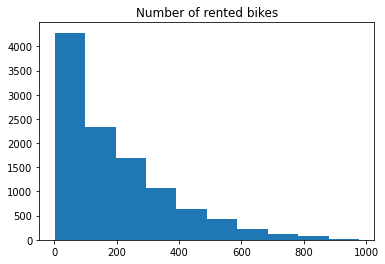

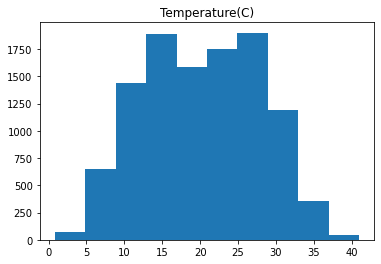

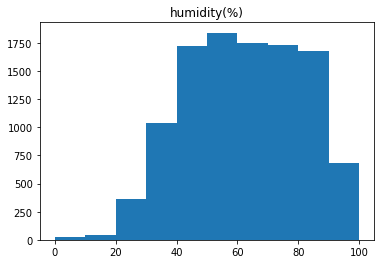

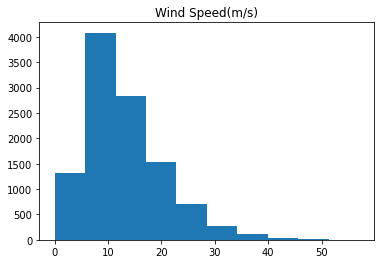

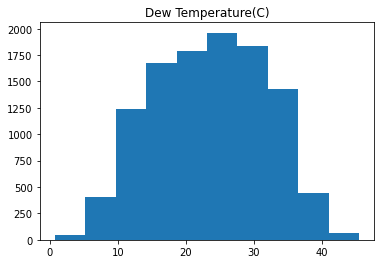

In [33]:
def my_plot(feature):
    plt.hist(data[feature])
    plt.title(feature)
    plt.show()
        
for i in features_plot:
    my_plot(i)

In [34]:
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins='auto')
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

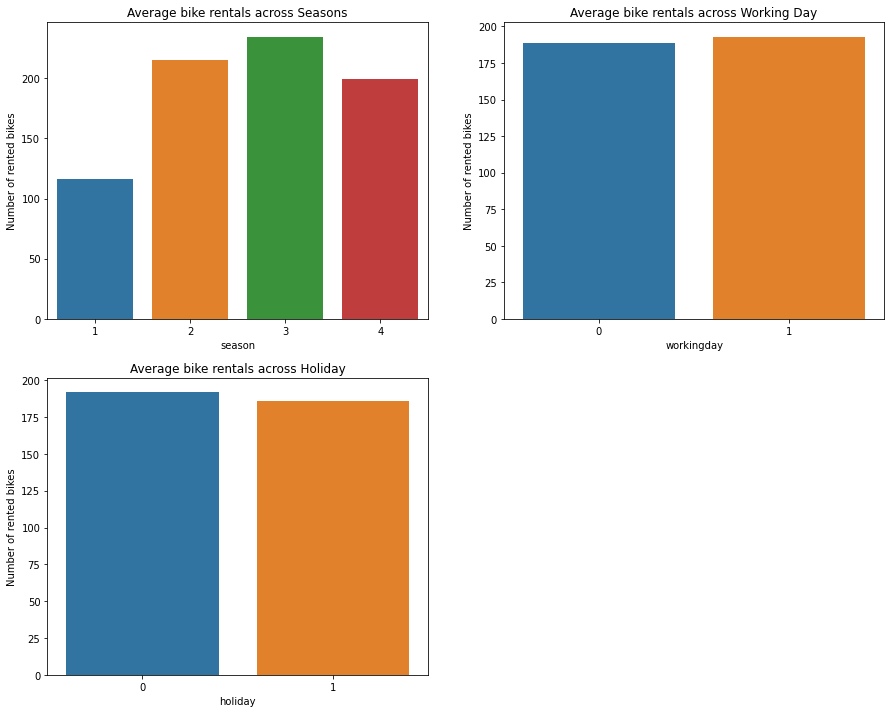

In [35]:
# Average values across each of the categorical columns 
fig = plt.figure(figsize=(15, 12))
axes = fig.add_subplot(2, 2, 1)
group_season = pd.DataFrame(data.groupby(['season'])['Number of rented bikes'].mean()).reset_index()
sns.barplot(data=group_season, x='season', y='Number of rented bikes', ax=axes)
axes.set(xlabel='season', ylabel='Number of rented bikes', title='Average bike rentals across Seasons')

axes = fig.add_subplot(2, 2, 2)
group_workingday = pd.DataFrame(data.groupby(['workingday'])['Number of rented bikes'].mean()).reset_index()
sns.barplot(data=group_workingday, x='workingday', y='Number of rented bikes', ax=axes)
axes.set(xlabel='workingday', ylabel='Number of rented bikes', title='Average bike rentals across Working Day')

axes = fig.add_subplot(2, 2, 3)
group_season = pd.DataFrame(data.groupby(['holiday'])['Number of rented bikes'].mean()).reset_index()
sns.barplot(data=group_season, x='holiday', y='Number of rented bikes', ax=axes)
axes.set(xlabel='holiday', ylabel='Number of rented bikes', title='Average bike rentals across Holiday')
plt.show()

# Hourly count based on functioning day

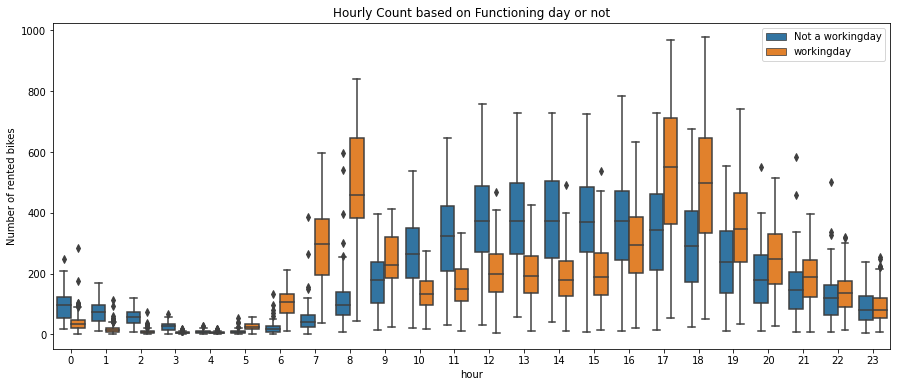

In [36]:
# seaborn boxplots across hours
f, axes = plt.subplots(1, 1, figsize=(15, 6))
sns.boxplot(data=data, y='Number of rented bikes', x='hour', hue='workingday', ax=axes)
handles, _ = axes.get_legend_handles_labels()
axes.legend(handles, ['Not a workingday', 'workingday'])
axes.set(title='Hourly Count based on Functioning day or not')

plt.show()

# Plotting average bike count for each hour as a function of various categories.

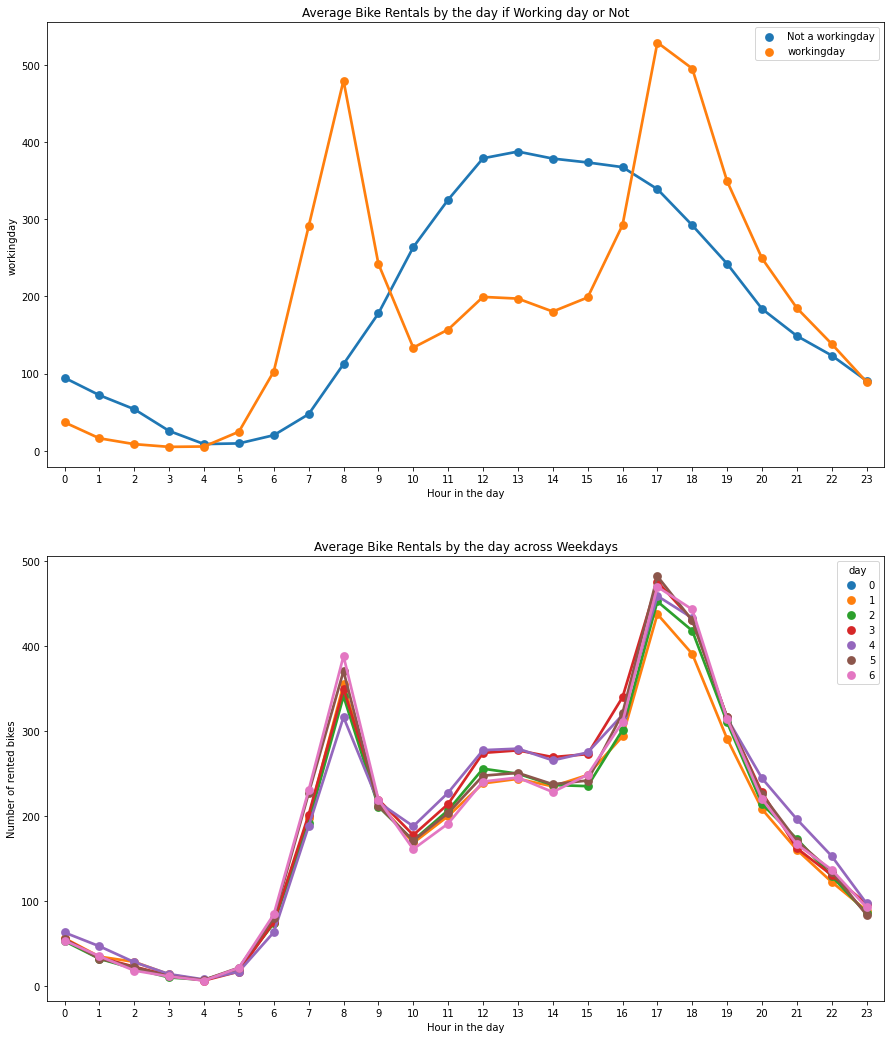

In [37]:

# Plots of average count across hour in a day for various categories

f, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 18))
group_work_hour = pd.DataFrame(data.groupby(['workingday', 'hour'])['Number of rented bikes'].mean()).reset_index()
sns.pointplot(data=group_work_hour, x='hour', y='Number of rented bikes', hue='workingday', ax=axes[0], legend=True)
handles, _ = axes[0].get_legend_handles_labels()
axes[0].legend(handles, ['Not a workingday', 'workingday'])
axes[0].set(xlabel='Hour in the day', ylabel='workingday', title='Average Bike Rentals by the day if Working day or Not')

hue_order= [0,1,2,3,4,5,6]
group_day_hour = pd.DataFrame(data.groupby(['day', 'hour'])['Number of rented bikes'].mean()).reset_index()
sns.pointplot(data=group_day_hour, x='hour', y='Number of rented bikes', hue='day', ax=axes[1], hue_order=hue_order)
axes[1].set(xlabel='Hour in the day', ylabel='Number of rented bikes', title='Average Bike Rentals by the day across Weekdays')


plt.show()

# Monthly distributions

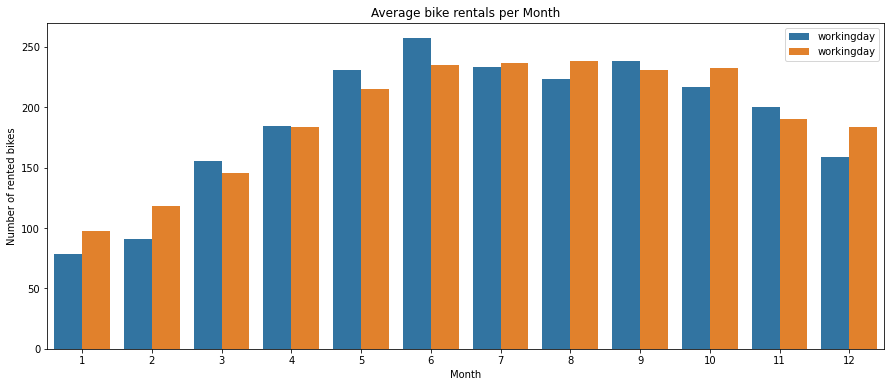

In [38]:
# Average Monthly Count Distribution plot
f, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
group_month = pd.DataFrame(data.groupby(['month', 'workingday'])['Number of rented bikes'].mean()).reset_index()
sns.barplot(data=group_month, x='month', y='Number of rented bikes', hue='workingday', ax=axes)
axes.set(xlabel='Month', ylabel='Number of rented bikes', title='Average bike rentals per Month')
handles, _ = axes.get_legend_handles_labels()
axes.legend(handles, ['workingday', 'workingday'])
plt.show()

# Rented bikes vs Temperature, Humidity and Windspeed

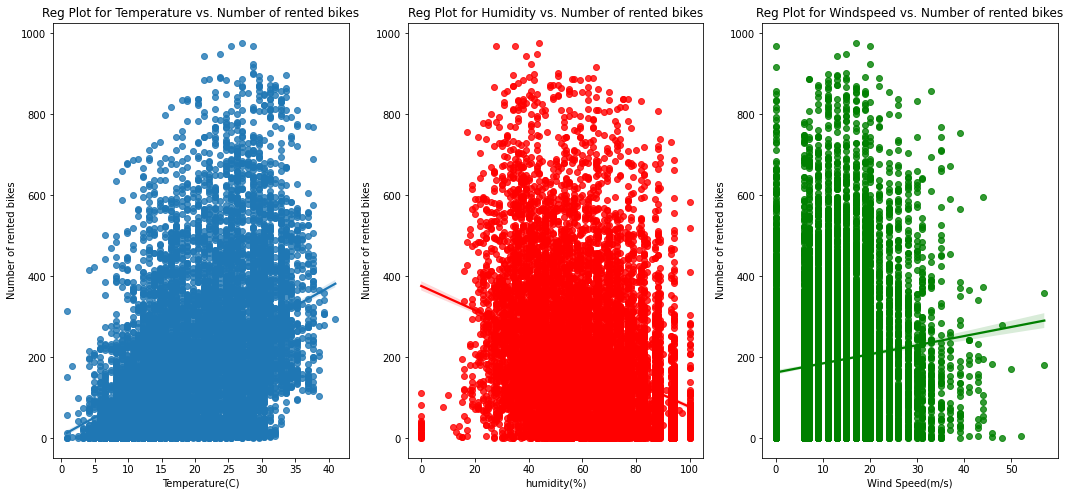

In [39]:
# Regression Plots with respect to Temperature, Humidity and Windspeed
fig = plt.figure(figsize=(18, 8))
axes = fig.add_subplot(1, 3, 1)
sns.regplot(data=data, x='Temperature(C)', y='Number of rented bikes',ax=axes)
axes.set(title='Reg Plot for Temperature vs. Number of rented bikes')
axes = fig.add_subplot(1, 3, 2)
sns.regplot(data=data, x='humidity(%)', y='Number of rented bikes',ax=axes, color='r')
axes.set(title='Reg Plot for Humidity vs. Number of rented bikes')
axes = fig.add_subplot(1, 3, 3)
sns.regplot(data=data, x='Wind Speed(m/s)', y='Number of rented bikes',ax=axes, color='g')
axes.set(title='Reg Plot for Windspeed vs. Number of rented bikes')
plt.show()

# Showing the distribution of categorical variables

# Number of rented bikes

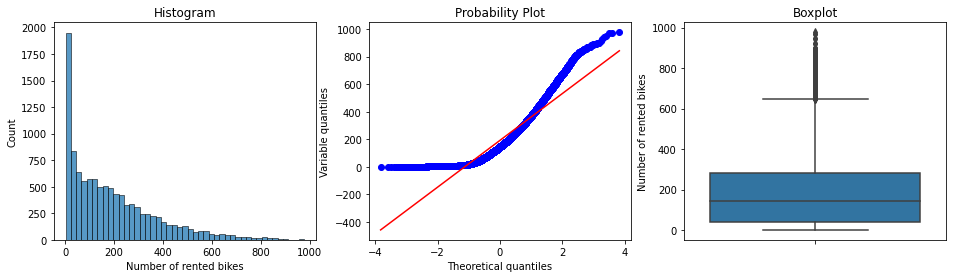

In [40]:
diagnostic_plots(data, 'Number of rented bikes')

# Temperatures

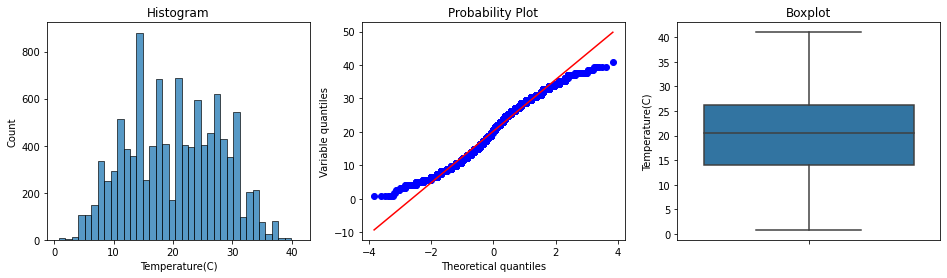

In [41]:
#showing distribution for temperature
diagnostic_plots(data, 'Temperature(C)')

# Humidity

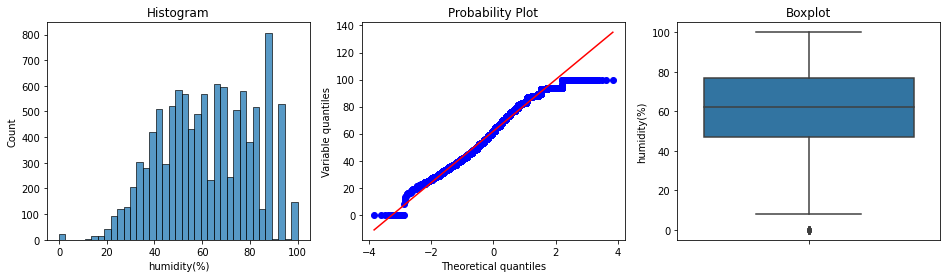

In [42]:
diagnostic_plots(data, 'humidity(%)')

# Dew Temperature

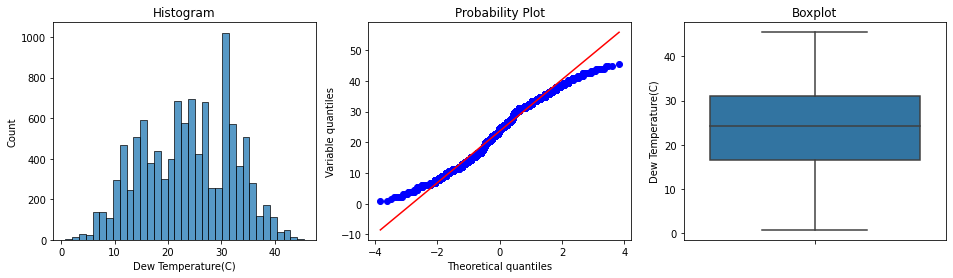

In [43]:
diagnostic_plots(data, 'Dew Temperature(C)')

In [44]:
data.shape   # the data size is much larger than number of outliers in data

(10886, 17)

## Handling Outliers

In [45]:
def find_skewed_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

# showing correlation between variables

<AxesSubplot:>

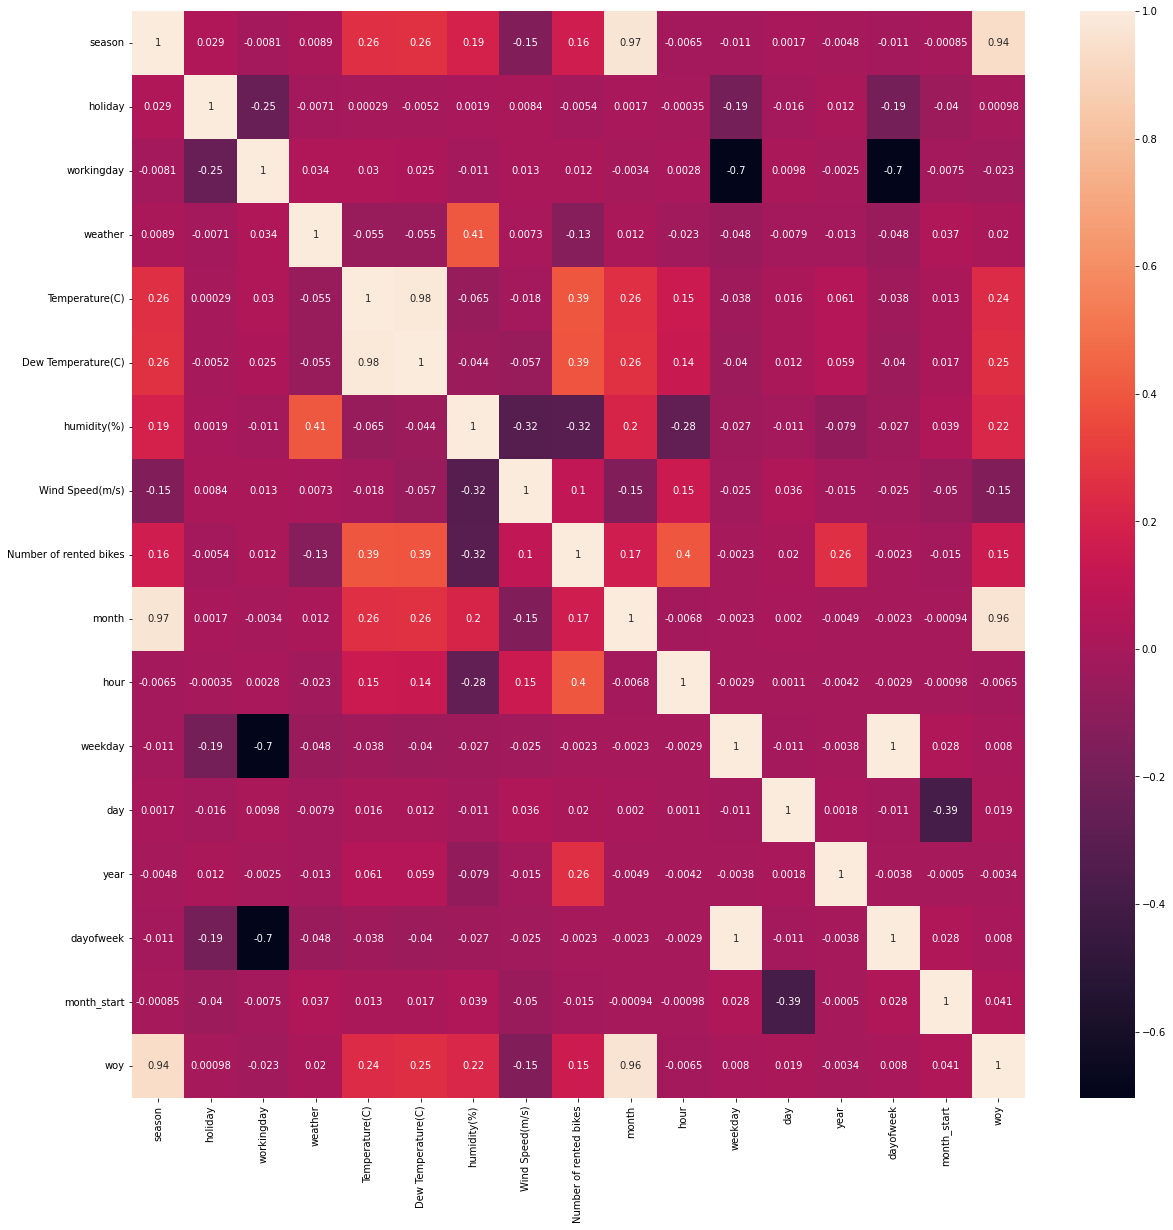

In [46]:
plt.figure(figsize=(20,20))
correlation=data.corr()
sns.heatmap(correlation,annot=True)

In [47]:
# data.drop("Dew Temperature(C)",axis=1,inplace=True)

In [48]:
data.columns

Index(['season', 'holiday', 'workingday', 'weather', 'Temperature(C)',
       'Dew Temperature(C)', 'humidity(%)', 'Wind Speed(m/s)',
       'Number of rented bikes', 'month', 'hour', 'weekday', 'day', 'year',
       'dayofweek', 'month_start', 'woy'],
      dtype='object')

# applying additional function to data :peak,ideal,sticky

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   season                  10886 non-null  int64  
 1   holiday                 10886 non-null  int64  
 2   workingday              10886 non-null  int64  
 3   weather                 10886 non-null  int64  
 4   Temperature(C)          10886 non-null  float64
 5   Dew Temperature(C)      10886 non-null  float64
 6   humidity(%)             10886 non-null  int64  
 7   Wind Speed(m/s)         10886 non-null  float64
 8   Number of rented bikes  10886 non-null  int64  
 9   month                   10886 non-null  int64  
 10  hour                    10886 non-null  int64  
 11  weekday                 10886 non-null  int64  
 12  day                     10886 non-null  int64  
 13  year                    10886 non-null  int64  
 14  dayofweek               10886 non-null

In [50]:
def additional(df):
    df['ideal'] = df[['Temperature(C)', 'Wind Speed(m/s)']].apply(lambda x: (0, 1)[x['Temperature(C)'] > 27 and x['Wind Speed(m/s)'] < 30], axis = 1)
    df['sticky'] = df[['humidity(%)', 'workingday']].apply(lambda x: (0, 1)[x['workingday'] == 1 and x['humidity(%)'] >= 60], axis = 1)
    df["windchill"]=13.12+0.6215*df['Temperature(C)']-11.37*(df['Wind Speed(m/s)']*3.6)**0.16+0.3965*df['Temperature(C)'] \
    *(df['Wind Speed(m/s)']*3.6)**0.16
    df['newweather']=17.3+df['Temperature(C)']-0.11*df['humidity(%)']+0.34*df['Wind Speed(m/s)']
    df['hour_sin'] = np.sin(2 * np.pi * df['hour']/23.0)
    df['hour_cos'] = np.cos(2 * np.pi * df['hour']/23.0)
    df['month_sin'] = np.sin(2 * np.pi * df['month']/12)
    df['month_cos'] = np.cos(2 * np.pi * df['month']/12)
    df['log_wind']=np.log1p(df['Wind Speed(m/s)'])
    df['log_hum']=np.log1p(df['humidity(%)'])
    
    return df

In [51]:
cond1 = data['workingday']== 'Yes'
cond2 = data['hour'].isin([7,8,9,17,18,19])
cond3 = data['hour'].isin([10,11,12,13,14,15,16])
cond4 = data['hour'].isin([0,1,2,3,4,5,6,20,21,22,23])

conditions =[~cond1,cond1&cond2,cond1&cond3,cond1&cond4]
vals = ['No','High','Medium','Low']
data['Map demand'] = np.select(conditions,vals)


In [52]:
data=additional(data)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  This is separate from the ipykernel package so we can avoid doing imports until


In [53]:
data.head()

,season,holiday,workingday,weather,Temperature(C),Dew Temperature(C),humidity(%),Wind Speed(m/s),Number of rented bikes,month,hour,weekday,day,year,dayofweek,month_start,woy,Map demand,ideal,sticky,windchill,newweather,hour_sin,hour_cos,month_sin,month_cos,log_wind,log_hum
0,1,0,0,1,9.84,14.395,81,0.0,16,1,0,5,1,2011,5,True,52,No,0,0,19.23556,18.23,0.000000,1.000000,0.5,0.866025,0.0,4.406719
1,1,0,0,1,9.02,13.635,80,0.0,40,1,1,5,1,2011,5,True,52,No,0,0,18.72593,17.52,0.269797,0.962917,0.5,0.866025,0.0,4.394449
2,1,0,0,1,9.02,13.635,80,0.0,32,1,2,5,1,2011,5,True,52,No,0,0,18.72593,17.52,0.519584,0.854419,0.5,0.866025,0.0,4.394449
3,1,0,0,1,9.84,14.395,75,0.0,13,1,3,5,1,2011,5,True,52,No,0,0,19.23556,18.89,0.730836,0.682553,0.5,0.866025,0.0,4.330733
4,1,0,0,1,9.84,14.395,75,0.0,1,1,4,5,1,2011,5,True,52,No,0,0,19.23556,18.89,0.887885,0.460065,0.5,0.866025,0.0,4.330733


# Showing the distribution of categorical variables

In [54]:
cat_features = data.columns[data.dtypes=='object']
cat_features=list(cat_features)
cat_features

['Map demand']

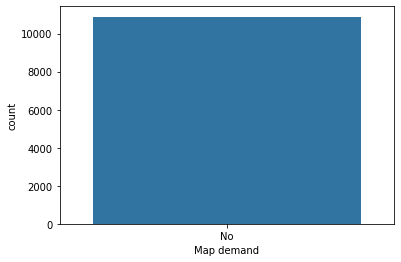

In [55]:
sns.countplot(x=cat_features[0],data=data)
plt.show()

In [56]:
def count_category(name):
    print(name)
    print(data[name].value_counts())
    print("-------------------------------------------------")
for i in cat_features:
    count_category(i)

Map demand
No    10886
Name: Map demand, dtype: int64
-------------------------------------------------


# EDA

In [57]:
count_bikes_by_hour = data.groupby("hour")["Number of rented bikes"].sum()
print(count_bikes_by_hour)

hour
0      25088
1      15372
2      10259
3       5091
4       2832
5       8935
6      34698
7      96968
8     165060
9     100910
10     79667
11     95857
12    116968
13    117551
14    111010
15    115960
16    144266
17    213757
18    196472
19    143767
20    104204
21     79057
22     60911
23     40816
Name: Number of rented bikes, dtype: int64


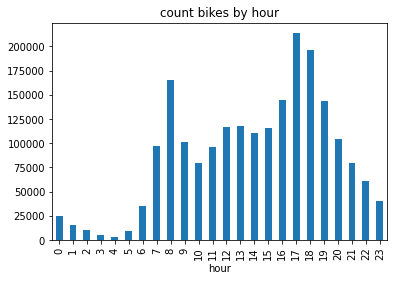

In [58]:
count_bikes_by_hour.plot(kind="bar",
title="count bikes by hour")
plt.savefig('count bikes by hr')
plt.show()

In [59]:
count_bikes_by_Holiday = data.groupby("holiday")["Number of rented bikes"].sum()
print(count_bikes_by_Holiday)

holiday
0    2027668
1      57808
Name: Number of rented bikes, dtype: int64


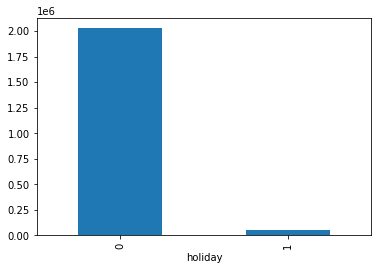

In [60]:
data.groupby("holiday")["Number of rented bikes"].sum().plot(kind="bar")
plt.savefig("count bikes by holiday")
plt.show()

In [61]:
count_bikes_by_funcday = data.groupby("workingday")["Number of rented bikes"].sum()
print(count_bikes_by_funcday)

workingday
0     654872
1    1430604
Name: Number of rented bikes, dtype: int64


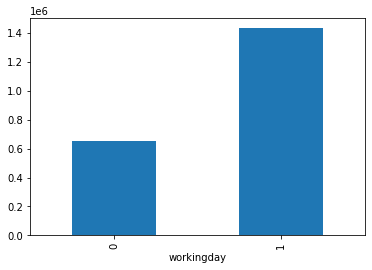

In [62]:
data.groupby("workingday")["Number of rented bikes"].sum().plot(kind="bar")
plt.savefig("count_bikes_by_funcday")
plt.show()

In [63]:
count_bikes_by_Season = data.groupby("season")["Number of rented bikes"].sum()
print(count_bikes_by_Season)

season
1    312498
2    588282
3    640662
4    544034
Name: Number of rented bikes, dtype: int64


<AxesSubplot:xlabel='season'>

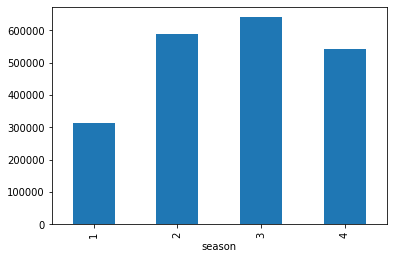

In [64]:
count_bikes_by_Season.plot(kind="bar")

## conclusion

There is a peak for renting bikes at 8 am and 6 pm which is most probably the time a person is going to or leaving his work

This is the order of season for number of rented bikes(descending order) ,

1)Autumn

2)Summer

3)Spring,

4)Winter

Most people rent bikes on Functioning days and days which aren't holidays

# Rolling Mean with window of 3

In [65]:
def rolling_mean(df,cols,window=3):
    for col in cols:
        new_col = col+'_rolled'
        df[new_col] = df[col].rolling(window=window).mean()
    return df


In [66]:
data =  rolling_mean(data,['Temperature(C)','Wind Speed(m/s)',
                        'humidity(%)','weather'])


In [67]:
def shifting(df,cols):
    for col in cols:
        new_col = col+'_shifted'
        df[new_col] = df[col].shift(periods=-1)
    return df
data =  shifting(data,['Temperature(C)','Wind Speed(m/s)','weather', 'humidity(%)'])
def shifting_1(df,cols):
    for col in cols:
        new_col = col+'_shifted1'
        df[new_col] = df[col].shift(periods=-2)
    return df
data =  shifting_1(data,['Temperature(C)','Wind Speed(m/s)','weather', 'humidity(%)'])

def shifting_2(df,cols):
    for col in cols:
        new_col = col+'_shifted2'
        df[new_col] = df[col].shift(periods=-3)
    return df
data =  shifting_2(data,['Temperature(C)','Wind Speed(m/s)','weather', 'humidity(%)'])

In [68]:
data=data.fillna(data.mean())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [69]:
data.head()

,season,holiday,workingday,weather,Temperature(C),Dew Temperature(C),humidity(%),Wind Speed(m/s),Number of rented bikes,month,hour,weekday,day,year,dayofweek,month_start,woy,Map demand,ideal,sticky,windchill,newweather,hour_sin,hour_cos,month_sin,month_cos,log_wind,log_hum,Temperature(C)_rolled,Wind Speed(m/s)_rolled,humidity(%)_rolled,weather_rolled,Temperature(C)_shifted,Wind Speed(m/s)_shifted,weather_shifted,humidity(%)_shifted,Temperature(C)_shifted1,Wind Speed(m/s)_shifted1,weather_shifted1,humidity(%)_shifted1,Temperature(C)_shifted2,Wind Speed(m/s)_shifted2,weather_shifted2,humidity(%)_shifted2
0,1,0,0,1,9.84,14.395,81,0.0,16,1,0,5,1,2011,5,True,52,No,0,0,19.23556,18.23,0.000000,1.000000,0.5,0.866025,0.0,4.406719,20.232468,12.801012,61.884509,1.418504,9.02,0.0000,1.0,80.0,9.02,0.0000,1.0,80.0,9.84,0.0000,1.0,75.0
1,1,0,0,1,9.02,13.635,80,0.0,40,1,1,5,1,2011,5,True,52,No,0,0,18.72593,17.52,0.269797,0.962917,0.5,0.866025,0.0,4.394449,20.232468,12.801012,61.884509,1.418504,9.02,0.0000,1.0,80.0,9.84,0.0000,1.0,75.0,9.84,0.0000,1.0,75.0
2,1,0,0,1,9.02,13.635,80,0.0,32,1,2,5,1,2011,5,True,52,No,0,0,18.72593,17.52,0.519584,0.854419,0.5,0.866025,0.0,4.394449,9.293333,0.000000,80.333333,1.000000,9.84,0.0000,1.0,75.0,9.84,0.0000,1.0,75.0,9.84,6.0032,2.0,75.0
3,1,0,0,1,9.84,14.395,75,0.0,13,1,3,5,1,2011,5,True,52,No,0,0,19.23556,18.89,0.730836,0.682553,0.5,0.866025,0.0,4.330733,9.293333,0.000000,78.333333,1.000000,9.84,0.0000,1.0,75.0,9.84,6.0032,2.0,75.0,9.02,0.0000,1.0,80.0
4,1,0,0,1,9.84,14.395,75,0.0,1,1,4,5,1,2011,5,True,52,No,0,0,19.23556,18.89,0.887885,0.460065,0.5,0.866025,0.0,4.330733,9.566667,0.000000,76.666667,1.000000,9.84,6.0032,2.0,75.0,9.02,0.0000,1.0,80.0,8.20,0.0000,1.0,86.0


# Converting Categorical Varibales

In [70]:
def conv_cat_features(df):
    df['holiday'].replace({"No Holiday":1, "Holiday":0}, inplace=True)
    df['workingday'].replace({"Yes":1, "No":0}, inplace=True)
    data_cat_transformed = pd.get_dummies(df, drop_first=True)
    return data_cat_transformed

In [71]:
data_cat_transformed=conv_cat_features(data)
# Print the number of features after one-hot encoding
print("{} total features after one-hot encoding.".format(len(data_cat_transformed.columns)))
print(data_cat_transformed.columns)#

43 total features after one-hot encoding.
Index(['season', 'holiday', 'workingday', 'weather', 'Temperature(C)',
       'Dew Temperature(C)', 'humidity(%)', 'Wind Speed(m/s)',
       'Number of rented bikes', 'month', 'hour', 'weekday', 'day', 'year',
       'dayofweek', 'month_start', 'woy', 'ideal', 'sticky', 'windchill',
       'newweather', 'hour_sin', 'hour_cos', 'month_sin', 'month_cos',
       'log_wind', 'log_hum', 'Temperature(C)_rolled',
       'Wind Speed(m/s)_rolled', 'humidity(%)_rolled', 'weather_rolled',
       'Temperature(C)_shifted', 'Wind Speed(m/s)_shifted', 'weather_shifted',
       'humidity(%)_shifted', 'Temperature(C)_shifted1',
       'Wind Speed(m/s)_shifted1', 'weather_shifted1', 'humidity(%)_shifted1',
       'Temperature(C)_shifted2', 'Wind Speed(m/s)_shifted2',
       'weather_shifted2', 'humidity(%)_shifted2'],
      dtype='object')


# Splitting the data into features and Target Label

In [72]:
# Split the data into features and target label
X = data_cat_transformed.drop('Number of rented bikes', axis=1)
y = data_cat_transformed['Number of rented bikes']
def custom_train_valid_split(data, cutoff_day=15):
    train = data[data['day'] <= cutoff_day]
    valid = data[data['day'] > cutoff_day]
    return train,valid

train,valid =  custom_train_valid_split(data, cutoff_day=15)
train_idx = train.index
valid_idx = valid.index
myCViterator = []
myCViterator.append( (train_idx, valid_idx) )

# Create Training Model

## Define Loss Function

In [73]:
def RMSLE(y_train,y_pred):
    return np.sqrt(mean_squared_log_error(y_train, y_pred))

In [74]:
def train_predict(regressor): 
    '''
    inputs:
       - regressor: the learning algorithm to be trained and predicted on
    '''
    
    results = {}
    
    # Fit the classifier to the training data and Calculate the time
    start_train = time()
    regressor = regressor.fit(X, y)
    end_train = time()
    results['train_time'] = round((end_train-start_train), 2)

    # Predict the training/testing labels and Calculate the time
    start_test = time()
    y_pred_train = regressor.predict(X)
    y_pred_test = regressor.predict(test_cat_transformed)
    end_test = time()   
    results['pred_time'] = round((end_test-start_test), 2)
    results['RMSLE_train'] =round(RMSLE(y, y_pred_train),4) 
    results['Rsquared_train'] = r2_score(y, y_pred_train)
    results['MSE_train'] = mean_squared_error(y, y_pred_train)
    return results,y_pred_test

# Test Data

In [75]:
test_df=pd.read_csv('../input/bike-sharing-demand/test.csv')
test_df_copy=test_df.copy()

In [76]:
test_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
std,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600


In [77]:
test_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [78]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [79]:
test_df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

In [80]:
test_df=test_df.rename(columns={col_names[5]: "Temperature(C)",col_names[6]:"Dew Temperature(C)",col_names[7]: "humidity(%)",
                          col_names[8]:"Wind Speed(m/s)"
              })

In [81]:
test_df=convert_date(test_df)

In [82]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   datetime            6493 non-null   datetime64[ns]
 1   season              6493 non-null   int64         
 2   holiday             6493 non-null   int64         
 3   workingday          6493 non-null   int64         
 4   weather             6493 non-null   int64         
 5   Temperature(C)      6493 non-null   float64       
 6   Dew Temperature(C)  6493 non-null   float64       
 7   humidity(%)         6493 non-null   int64         
 8   Wind Speed(m/s)     6493 non-null   float64       
 9   month               6493 non-null   int64         
 10  hour                6493 non-null   int64         
 11  weekday             6493 non-null   int64         
 12  day                 6493 non-null   int64         
 13  year                6493 non-null   int64       

In [83]:
cond1 = test_df['workingday']=='Yes'
cond2 = test_df['hour'].isin([7,8,9,17,18,19])
cond3 = test_df['hour'].isin([10,11,12,13,14,15,16])
cond4 = test_df['hour'].isin([0,1,2,3,4,5,6,20,21,22,23])
conditions =[~cond1,cond1&cond2,cond1&cond3,cond1&cond4]
vals = ['No','High','Medium','Low']
test_df['Map demand'] = np.select(conditions,vals)

In [84]:
test_df=test_df.drop(['datetime',],axis=1)


In [85]:
test_df=additional(test_df)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  This is separate from the ipykernel package so we can avoid doing imports until


In [86]:
test_df =  rolling_mean(test_df,['Temperature(C)','Wind Speed(m/s)','weather', 'humidity(%)'])
test_df =  shifting(test_df,['Temperature(C)','Wind Speed(m/s)','weather', 'humidity(%)'])
test_df =  shifting_1(test_df,['Temperature(C)','Wind Speed(m/s)','weather', 'humidity(%)'])
test_df =  shifting_2(test_df,['Temperature(C)','Wind Speed(m/s)','weather', 'humidity(%)'])
test_df=test_df.fillna(test_df.mean())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """


In [87]:
test_cat_transformed=conv_cat_features(test_df)

# Model Tuning

In [88]:
# parameters={
#  "learning_rate"    :np.arange(0.04,0.2,0.01)   ,                             # [0.05,0.06,0.065,0.07,0.075,0.08,0.085,0.09,0.10,0.125,0.15,0.2] ,
#   "max_depth"        :np.arange(4,16,1) ,                    #[4,5,6,7,8,9,10]
#   "min_child_weight" : np.arange(11,17, 1),  #[1,2,3,4,5,6,7,8,9,10],
#   "gamma"            : np.arange(2,10,0.5)  ,               #    [0.5,1,2,3,5,7,6,8,9,10],
#   "n_estimators"     :np.arange(2500,3500, 50),      # [500,700,800,900,1000,1200,1300,1400,1500,1600,1700,1800,1900,2000,2200,2500,2750],
#   "subsample"        :np.arange(0.7, 1, 0.02) ,
#   "colsample_bytree" :np.arange(0.4,1,0.05), # [0.7,0.75,0.8,0.85,0.9,0.95,1],
#   "tree_method"    : ["gpu_hist"]
#      }

In [89]:
# def model_tuning(reg, parameters):    

#     # Evaluate using neg_mean_squared_log_error 
#     #scorer = make_scorer(RMSLE,greater_is_better=False)

#     # Perform grid search on the regressor and tune parameters, using scorer evaluation
#     grid_obj = RandomizedSearchCV(estimator=reg, param_distributions=parameters,n_iter=300, 
#                                   scoring="neg_mean_squared_log_error",n_jobs=-1,cv=5,verbose=3)

#     # Fit the grid search object to the training data and find the optimal parameters
#     grid_fit = grid_obj.fit(X, y)

#     # Get the best estimator
#     best_clf = grid_fit.best_estimator_
#     print(f"best mean cross validation score: {grid_fit.best_score_}")
#     print(f"best parameters: {grid_fit.best_params_}")
    
#     # Make predictions using the optimized and the best model
#     y_best_pred = best_clf.predict(test_cat_transformed)
    
#     return best_clf,grid_fit, y_best_pred

In [90]:
# clf, best_clf,grid_fit, y_best_pred=model_tuning(regressor, parameters)

In [91]:
# best_clf

In [92]:
# grid_fit

> After Running HyperParameter Tuning jobs on xgboost model and catboost model the optimum parameters reached were:
> - XGBoost: {}
> - CatBoost: {}

In [93]:
X_train=X.copy()
X_test=test_cat_transformed.copy()

In [94]:
print(X_train.shape)
print(X_test.shape)

(10886, 42)
(6493, 42)


In [95]:
X_train_cat = X_train.copy()
X_test_cat = X_test.copy()

In [96]:
# X_train_xgb=X_train.drop(['hour_sin', 'hour_cos','month_sin', 'month_cos','woy','windchill', 
#                       'newweather','Temperature(C)_rolled','Dew Temperature(C)',
#                       'humidity(%)','Wind Speed(m/s)_rolled', 
#                       ],axis=1)
# X_test_xgb=X_test.drop(['hour_sin', 'hour_cos','month_sin', 'month_cos','woy','windchill', 
#                     'newweather','Temperature(C)_rolled','Dew Temperature(C)',
#                     'humidity(%)','Wind Speed(m/s)_rolled',
#                     ],axis=1)

In [97]:
xgb_v = XGBRegressor(
   objective='count:poisson',random_state=42)



xgb= XGBRegressor(
    objective='count:poisson',random_state=42,
   subsample= 0.83, n_estimators= 3000, 
   min_child_weight= 16, max_depth= 5, 
   learning_rate= 0.055, gamma= 1, colsample_bytree= 0.5)

catboost_v=CatBoostRegressor(objective='Poisson',iterations=4000,l2_leaf_reg=1,learning_rate=0.054  , silent = True)
catboosttrial=CatBoostRegressor(objective='Poisson',iterations=4000,l2_leaf_reg=1,learning_rate=0.054,silent=True)                              
xgb_models={
    "XGB_vanella":xgb_v,
    "XGB_mod" : xgb }
cat_models ={
    "Catbbost_mod" :catboosttrial,
    "Catboost_Vanilla" :catboost_v}

In [98]:
columns = ['Classifier', 'RMSLE']

df_scores_cat = pd.DataFrame(columns=columns)
for name, model in cat_models.items():
    model.fit(X_train_cat, y)
    Y_predicted = model.predict(X_train_cat)
    rmsle = np.sqrt(mean_squared_log_error(y, Y_predicted))
    df_row = pd.DataFrame([[name, rmsle]], columns=columns)
    df_scores_cat = df_scores_cat.append(df_row, ignore_index=True)

In [99]:
columns = ['Classifier', 'RMSLE']

df_scores_xgb = pd.DataFrame(columns=columns)
for name, model in xgb_models.items():
    model.fit(X_train, y)
    Y_predicted = model.predict(X_train)
    rmsle = np.sqrt(mean_squared_log_error(y, Y_predicted))
    df_row = pd.DataFrame([[name, rmsle]], columns=columns)
    df_scores_xgb = df_scores_xgb.append(df_row, ignore_index=True)

In [100]:
df_scores_cat.sort_values(by=['RMSLE'])

,Classifier,RMSLE
0,Catbbost_mod,0.177118
1,Catboost_Vanilla,0.177118


In [101]:
df_scores_xgb.sort_values(by=['RMSLE'])

,Classifier,RMSLE
1,XGB_mod,0.173502
0,XGB_vanella,0.230923


# Plot Feature importance from Xgboostregressor without any hyperparameter tuning

<Figure size 1080x864 with 0 Axes>

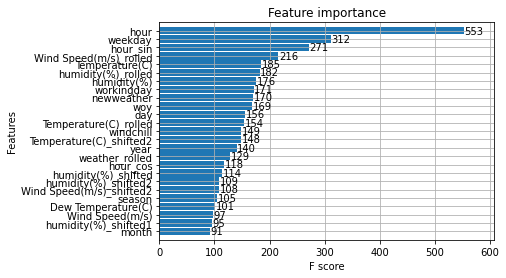

In [102]:
from xgboost import plot_importance, plot_tree
fig = plt.figure(figsize=(15,12))
fig = plot_importance(xgb_v, height=0.9,max_num_features = 25)
plt.show()

# Plot Feature importance from Xgboostregressor with best parameters after hyperparameter tuning

<Figure size 1080x864 with 0 Axes>

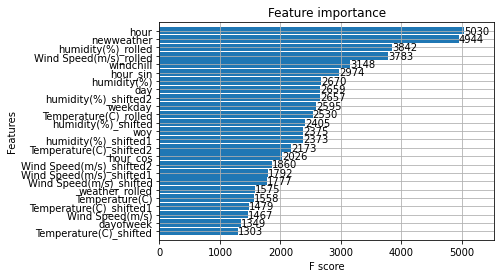

In [103]:
fig = plt.figure(figsize=(15,12))
fig = plot_importance(xgb, height=0.9,max_num_features = 25)
plt.show()

# Getting the results on Test Data

In [104]:
y_cat_pred=catboosttrial.predict(X_test_cat)

In [105]:
y_xgb_pred=xgb.predict(X_test)

In [106]:
# # #getting the output from train predicgt func
# test_df_copy['yxgb']=y_xgb_pred.astype('int')
# test_df_copy['ycat']=y_cat_pred.astype('int')

In [107]:
# yavg = 0.64*test_df_copy['yxgb'] + 0.36*test_df_copy['ycat']


In [108]:
test_df_copy['count'] = y_cat_pred.astype('int')

In [109]:
test_df_copy[test_df_copy["workingday"]=='No']

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count


In [110]:
test_df_copy[['datetime','count']].to_csv("submissions1.csv",index=False)